In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs
plt.style.use('dark_background')

In [2]:
df = pd.read_csv("./animals_info.csv")
df.head()

,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,...,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,Canis lupus,...,75 km/h,16-60 kg,80-85 cm,105-160 cm,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Stable', 'Population sta..."
1,Tiger,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,Panthera tigris,...,96 km/h,65-306 kg,NaN,200-390 cm,"Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Lifestyle': 'Cursorial, Terrestrial, Ambush ...",Carnivore,"{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
2,Brown Bear,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ursus,Ursus arctos,...,56 km/h,100-635 kg,70-153 cm,1.4-2.8 m,"Crepuscular,Omnivore,Terrestrial,Altricial,Nom...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'sloth, sleuth', 'Lifestyle': '...",Omnivore,"{'Mating behavior': 'Polygynandry,', 'Reproduc...","{'Population trend': 'Stable', 'Population sta..."
3,Blue Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Balaenopteridae,Balaenoptera,Balaenoptera musculus,...,20 km/h,100-160 t,NaN,25-30 m,"Carnivore,Piscivores,Aquatic,Precocial,Natator...","{'Geography': {'Continents': 'Africa, South Am...","{'Group name': 'pod, gam, herd, school, mod', ...","Carnivore,,Piscivores","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Increasing', 'Population..."
4,Killer Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Delphinidae,Orcinus,Orcinus orca,...,45 km/h,3-6 t,NaN,6-9 m,"Diurnal,Carnivore,Aquatic,Precocial,Cosmopolit...","{'Geography': {'Continents': 'Africa, Oceania,...","{'Group name': 'pod, gam, herd, school, mod', ...",Carnivore,"{'Mating behavior': 'Polygynandry', 'Reproduct...",{'Population status': 'Data deficient (DD)'}


In [3]:
df.describe()

,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,...,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
count,199,199,173,199,199,199,107,199,198,199,...,134,182,98,176,199,199,199,184,199,199
unique,199,22,1,2,2,16,6,59,137,185,...,57,179,89,168,190,194,186,51,183,25
top,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Felidae,Feliformia,Felidae,...,40 km/h,8-18 kg,60-90 cm,20-25 cm,starts with,"{'Geography': {'Countries': ''}, 'Biome': [], ...",{'Lifestyle': ''},Carnivore,{},"{'Population trend': 'Stable', 'Population sta..."
freq,1,173,173,173,173,72,42,23,7,7,...,11,2,3,2,7,4,8,30,17,46


In [4]:
df.dtypes

Name               object
Kingdom            object
Phylum             object
Subphylum          object
Class              object
Order              object
Suborder           object
Family             object
Genus              object
Species            object
Population size    object
Life span          object
Top speed          object
Weight             object
Height             object
Length             object
Attributes         object
Distribution       object
Habits             object
Diet               object
Mating_Habits      object
Population         object
dtype: object

In [5]:
from sklearn import preprocessing
import pandas as pd

# Split data
df_numeric = df.select_dtypes(include=['number'])
df_non_numeric = df.select_dtypes(exclude=['number'])

# Initialize scalers
scaler = preprocessing.StandardScaler()
encoder = preprocessing.OneHotEncoder(sparse_output=False)  # Avoid calling .toarray()

# Process numeric
df_scaled = pd.DataFrame()
if not df_numeric.empty:
    df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Process non-numeric
df_encoded = pd.DataFrame()
if not df_non_numeric.empty:
    df_encoded = pd.DataFrame(
        encoder.fit_transform(df_non_numeric),
        columns=encoder.get_feature_names_out(df_non_numeric.columns)
    )

# Combine processed data
final_df = pd.concat([df_scaled.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

# Describe the final dataframe
final_df.describe()


,Name_Aardvark,Name_Aardwolf,Name_African Buffalo,Name_African Bush Elephant,Name_African Wild Dog,Name_African wildcat,Name_Alpaca,Name_Alpine Ibex,Name_Amazon River Dolphin,Name_American Badger,...,"Population_{'Population trend': 'Increasing', 'Population status': 'Critically endangered (CR)'}","Population_{'Population trend': 'Increasing', 'Population status': 'Endangered (EN)'}","Population_{'Population trend': 'Increasing', 'Population status': 'Least concern (LC)'}","Population_{'Population trend': 'Increasing', 'Population status': 'Near Threatened (NT)'}","Population_{'Population trend': 'Increasing', 'Population status': 'Vulnerable (VU)'}","Population_{'Population trend': 'Stable', 'Population status': 'Critically endangered (CR)'}","Population_{'Population trend': 'Stable', 'Population status': 'Endangered (EN)'}","Population_{'Population trend': 'Stable', 'Population status': 'Least concern (LC)'}","Population_{'Population trend': 'Stable', 'Population status': 'Near Threatened (NT)'}",Population_{}
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.005025,0.005025,0.005025,0.005025,0.005025,0.005025,0.005025,0.005025,0.005025,0.005025,...,0.005025,0.025126,0.080402,0.005025,0.020101,0.010050,0.005025,0.231156,0.010050,0.070352
std,0.070888,0.070888,0.070888,0.070888,0.070888,0.070888,0.070888,0.070888,0.070888,0.070888,...,0.070888,0.156901,0.272600,0.070888,0.140698,0.099997,0.070888,0.422635,0.099997,0.256384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


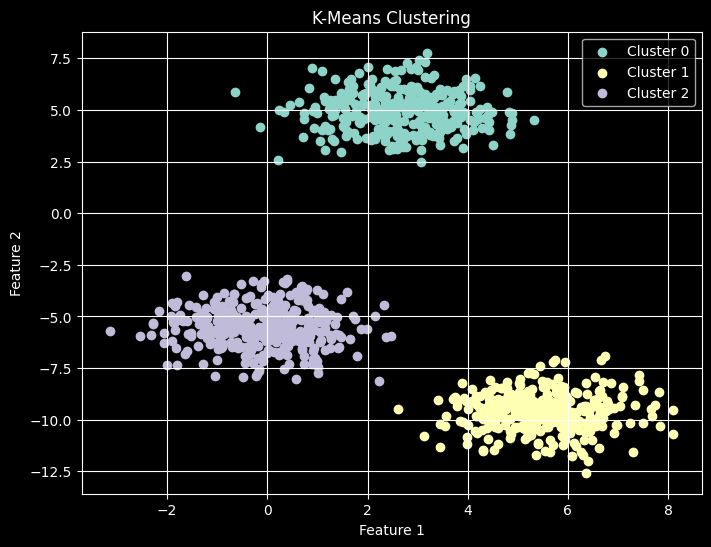

In [6]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    # plotinng scatter plot
    def plot_fig(self, X, y):
        plt.figure(figsize=(8, 6))
        for cluster_idx in range(self.K):
            cluster_points = X[y == cluster_idx]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_idx}')
        plt.title("K-Means Clustering")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.grid(True)
        plt.show()
        
    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # predict function
        if self.plot_figure: # if true
            self.plot_fig(X, y_pred) # plot function 
        return y_pred
            
if __name__ == "__main__":
    np.random.seed(10)
    num_clusters = 3 # num of cluster
    X, _ = make_blobs(n_samples=1000, n_features=2, centers=num_clusters) # create dataset using make_blobs from sklearn datasets
    Kmeans = KMeansClustering(X, num_clusters)
    y_pred = Kmeans.fit(X)

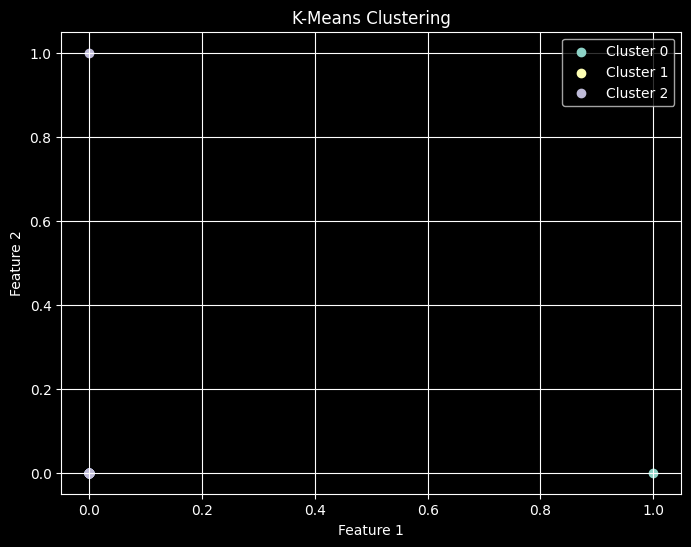

In [24]:
kmeanz = KMeansClustering(final_df.values, 3)
y_pred = kmeanz.fit(final_df.values)

In [7]:
kmeans = cluster.KMeans(n_clusters=2, init='k-means++') # ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
kmeans.fit(final_df)

KMeans(n_clusters=2)

In [8]:
kmeans.inertia_

3340.709344660201

Text(0, 0.5, 'Inertia')

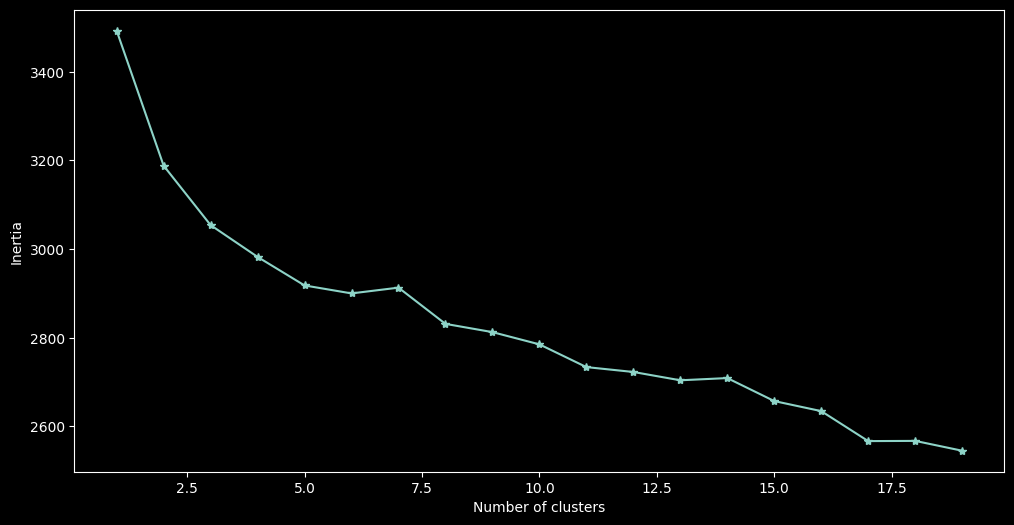

In [9]:
SSE = []
for i in range(1,20):
    kmeans = cluster.KMeans(n_clusters = i, init='k-means++') # iterate from range (1, 20)
    kmeans.fit(final_df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++')
kmeans.fit(final_df)
pred = kmeans.predict(final_df)
pred

KMeans(n_clusters=5)

In [11]:
frame = pd.DataFrame(final_df)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
4    60
3    46
1    39
2    28
0    26
Name: count, dtype: int64

In [21]:
dataset = df.copy()
dataset["cluster"] = pred   

# print(dataset['population'].head())
print(dataset['cluster'].head())

0    3
1    2
2    3
3    4
4    4
Name: cluster, dtype: int32


In [19]:
def auto_assign_params(df):
    # Get a list of numeric columns from df (not final_df)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) < 3:
        raise ValueError("Dataset does not have at least 3 numeric columns for x, y, and z axes.")
    # Use the first three numeric columns for x, y, and z
    x = numeric_cols[0]
    y = numeric_cols[1]
    z = numeric_cols[2]
    
    # For color, check if there's a 'cluster' column; if not, leave as None
    color = "cluster" if "cluster" in df.columns else None
    
    # For size, check if 'Population' exists; if not, default to the first numeric column
    size = "Population" if "Population" in df.columns else x
    
    return x, y, z, color, size

# Automatically assign parameters based on the dataset:
x_param, y_param, z_param, color_param, size_param = auto_assign_params(dataset)

# Create a 3D scatter plot using the dynamically assigned parameters:
fig = px.scatter_3d(dataset,
                    x=x_param,
                    y=y_param,
                    z=z_param,
                    color=color_param,
                    size=size_param,
                    size_max=30)
fig.show()

ValueError: Dataset does not have at least 3 numeric columns for x, y, and z axes.

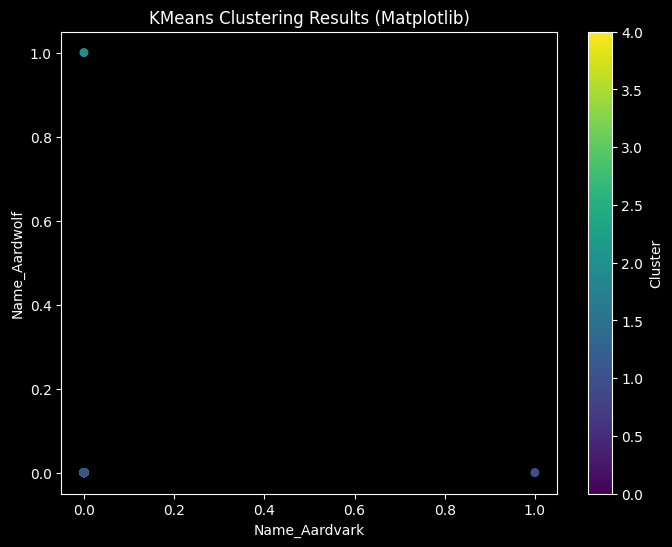

In [22]:
# Automatically assign parameters from final_df (the processed DataFrame used for kmeans)
def auto_assign_params_clustering(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) < 2:
        raise ValueError("Need at least two numeric columns for plotting.")
    return numeric_cols[0], numeric_cols[1]

x_feature, y_feature = auto_assign_params_clustering(final_df)

plt.figure(figsize=(8,6))
plt.scatter(final_df[x_feature], final_df[y_feature], c=pred, cmap='viridis', s=30)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("KMeans Clustering Results (Matplotlib)")
plt.colorbar(label="Cluster")
plt.show()